In [4]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier as ADC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import BallTree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV as GSearch

from imblearn.under_sampling import RandomUnderSampler 

In [5]:
airline_df = pd.read_csv('./data/airline_data.csv')
airline_df.dropna(inplace=True)
airline_df.reset_index(drop=True, inplace=True)
airline_df = pd.get_dummies(airline_df, prefix = None, prefix_sep = '_', dummy_na = False, columns = ['satisfaction','Gender', 'Customer Type', 'Type of Travel', 'Class'], sparse = False, drop_first = False, dtype = None)
columns_drop = ['id', 'Unnamed: 0.1', 'Unnamed: 0', 'satisfaction_neutral or dissatisfied']
airline_df.drop(columns_drop, axis=1, inplace = True)


In [6]:
airline_df.isnull().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction_satisfied               0
Gender_Female                        0
Gender_Male                          0
Customer Type_Loyal Customer         0
Customer Type_disloyal Customer      0
Type of Travel_Business travel       0
Type of Travel_Personal Travel       0
Class_Business           

In [7]:
airline_df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction_satisfied', 'Gender_Female', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [8]:
airline_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction_satisfied,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,1,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,1,0,1,1,0,1,0,1,0,0


In [9]:

airline_df.dropna(inplace=True)
airline_df.reset_index(drop=True, inplace=True)

In [10]:
reduced_df = airline_df.sample(frac=0.10, random_state=42)
reduced_df.shape

(12949, 28)

In [11]:
reduced_df.satisfaction_satisfied.value_counts()

0    7323
1    5626
Name: satisfaction_satisfied, dtype: int64

In [12]:
target = reduced_df['satisfaction_satisfied']

In [13]:
input_columns = reduced_df.loc[:, airline_df.columns != "satisfaction_satisfied"]

In [14]:
input_columns.shape

(12949, 27)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, stratify=target, train_size=0.8)

R:  0.9395555555555556
P:  0.5040534096328088
A:  0.5722007722007721
F:  0.6561142147734327


<AxesSubplot:>

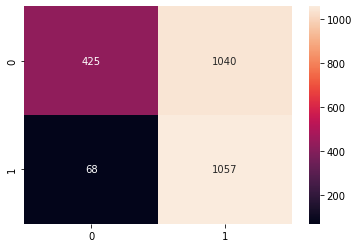

In [16]:
SGD_model = SGDClassifier(loss="perceptron", penalty="l2", max_iter=10000)

SGD_model.fit(x_train, y_train)

SGD_hat = SGD_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test, SGD_hat)
precision = sklearn.metrics.precision_score(y_test, SGD_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, SGD_hat)
f_measure = sklearn.metrics.f1_score(y_test, SGD_hat)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, SGD_hat), annot=True, fmt='g')

# Ivan 

R:  0.8773333333333333
P:  0.896457765667575
A:  0.9027027027027027
F:  0.8867924528301886


<AxesSubplot:>

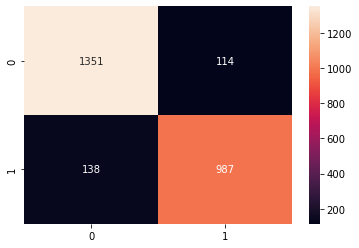

In [17]:
NB_model = CategoricalNB(alpha = 3)

NB_model.fit(x_train, y_train)

NB_hat = NB_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test,NB_hat)
precision = sklearn.metrics.precision_score(y_test, NB_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, NB_hat)
f_measure = sklearn.metrics.f1_score(y_test, NB_hat)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

sns.heatmap(confusion_matrix(y_test, NB_hat), annot=True, fmt='g')

# Ivan

**Categorical Naive Bayes**

The categorical Naive Bayes model works using the Bayes Theorem, which assumes that individual features are independent on each other, which works well with our dataset, as we can see through our correlation matrix that none of our features are very correlated. Applying the Bayes Theorem assigns a probability to each feature in the dataset, then uses those probabilities to predict a whole outcome. The categorical Native Bayes model works best for categorical data, which works well with our dataset, as we have a lot of categorical data in the form of 1\-5 ratings for the airline's performance.



In [18]:
#Neural_model = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(20, 20), random_state=1)

#Neural_model.fit(x_train, y_train)

#Neural_hat = Neural_model.predict(x_test)

#precision = sklearn.metrics.precision_score(y_test, Neural_hat)
#accuracy = sklearn.metrics.accuracy_score(y_test, Neural_hat)
#print("P: ", precision)
#print("A: ", accuracy)

#sns.heatmap(confusion_matrix(y_test, Neural_hat), annot=True, fmt='g')

R:  0.9173333333333333
P:  0.9467889908256881
A:  0.9416988416988417
F:  0.9318284424379233


<AxesSubplot:>

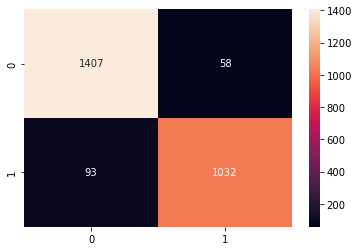

In [19]:
RF_model = RandomForestClassifier(n_estimators=20)

RF_model.fit(x_train, y_train)

RF_hat = RF_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test, RF_hat)
precision = sklearn.metrics.precision_score(y_test, RF_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, RF_hat)
f_measure = sklearn.metrics.f1_score(y_test, RF_hat)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

sns.heatmap(confusion_matrix(y_test, RF_hat), annot=True, fmt='g')

**Random Forest**

A random forest is a model that makes a given number of randomized decision trees and uses them to make predictions on the data by using averaging functions to combine its results from several decision trees, making a more accurate/realistic prediction. Randomizing decision trees allows the model to individually look for correlations between sections of the dataset, making predictions more intuitive, compared to looking at the entire dataset through one decision tree, where it is harder to find patterns when there are so many variables to consider. It then takes the accuracy of the models it makes and displays them on the heatmap so that we can see how accurate/precise the model is. Through some light hyperparameter tuning, we found that at around 20 decision trees, there was no more improvement in the performance of the model and subsequent additions to the amount of decision trees would just increase the processing time. There were also no differences in accuracy/precision when we tried different criterion such as "entropy" and "log\_loss", so we decided that "gini", the default criterion, was good enough for the model.

- What are the pros and cons of the random forest
- [https://towardsdatascience.com/hyperparameter\-tuning\-the\-random\-forest\-in\-python\-using\-scikit\-learn\-28d2aa77dd74](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)



Accuracy: 0.8857142857142857
Precision: 0.9132602193419741
Recall: 0.8142222222222222
F1 Score: 0.8609022556390977


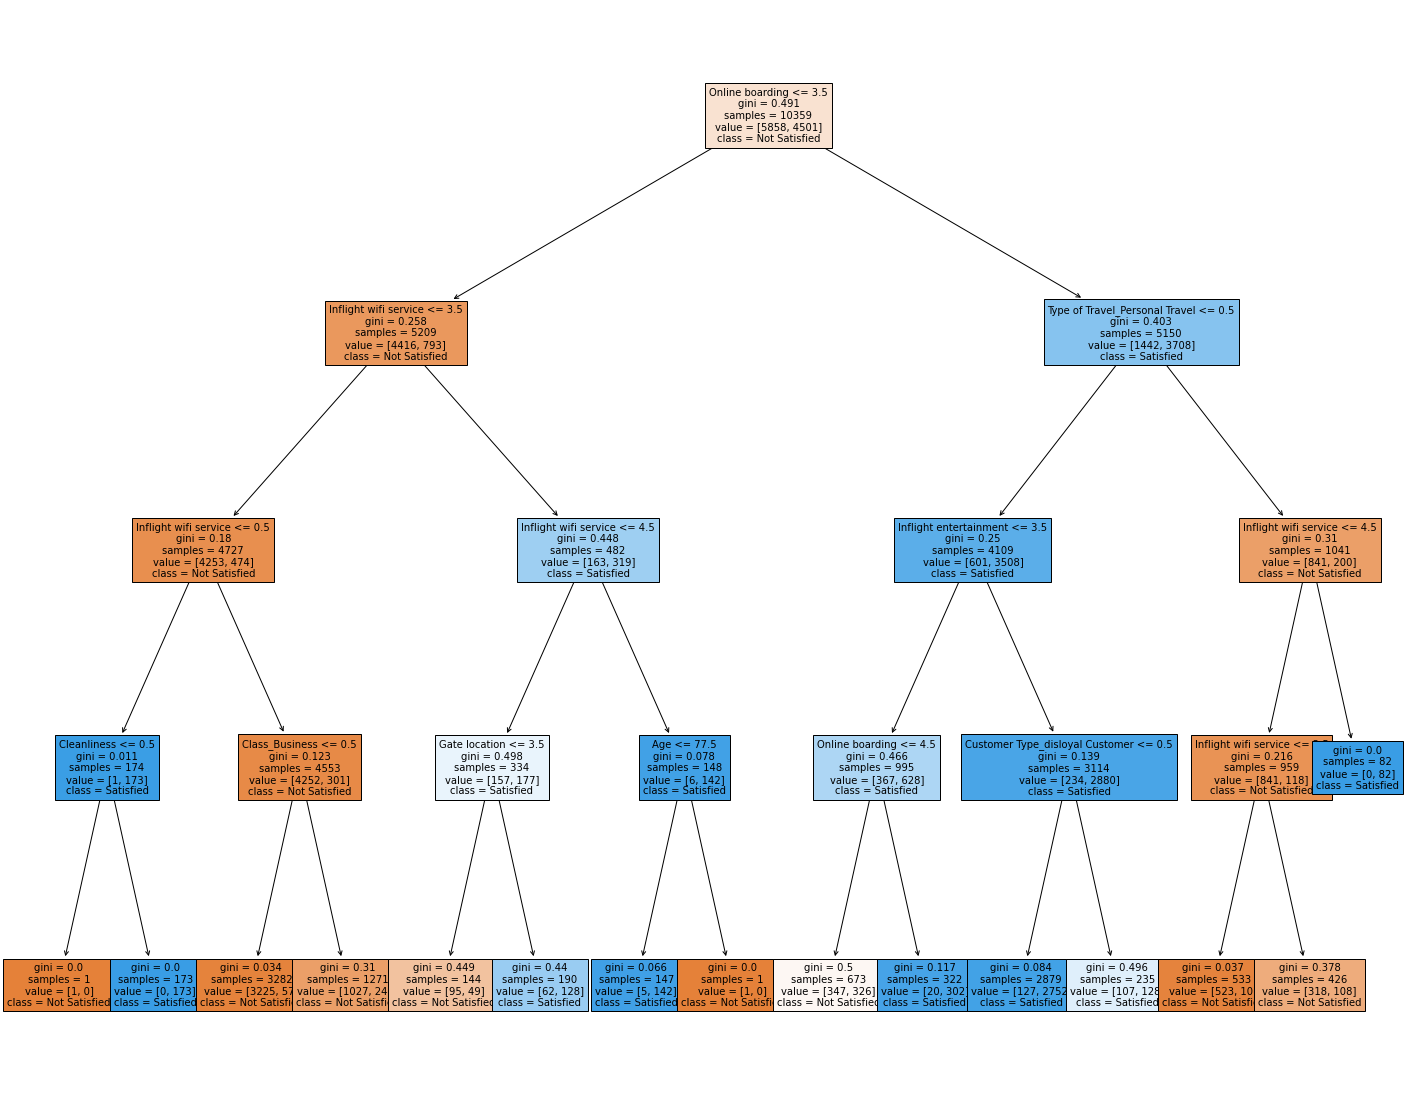

In [26]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf = tree_clf.fit(x_train, y_train)
y_pred_tree = tree_clf.predict(x_test)
# params = {'min_samples_split': [1,2,3,4], 'min_samples_leaf': [1,2,3,4], 'min_weight_fraction_leaf': [-1.0,0.0,1.0], 'max_leaf_nodes': list(range(1,5))}
# tree_gsearch = GSearch(DecisionTreeClassifier(max_depth=7), params)
# tree_gsearch.fit(x_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf,
                   feature_names=input_columns.columns,  
                   class_names=['Not Satisfied','Satisfied'],
                   filled=True, fontsize=10)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))

In [0]:
tree_gsearch.best_params_

**Decision Tree:**

A decision tree is a graph that classifies items and whether it is true or false to the question in the box. In this example, we use satisfied for true and false for dissatisfied.



In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

print("P: ", precision)
print("A: ", accuracy)

a Decision Tree Classifier makes various questions to help determine what group a variable falls into. it goes from the top, and depending on how a question is answered it goes down a path to a different leaf in the tree. It goes all the way down and at the end it puts that variable into a group

- What is a splitting criteron
- What are the pros and cons?
- 



In [0]:
tree_clf = DecisionTreeClassifier()
adc_clf = ADC()

In [0]:
tree_clf.fit(x_train, y_train)

In [0]:
adc_clf.fit(x_train, y_train)

In [0]:
adc_pred = adc_clf.predict(x_test)

In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, adc_pred), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

print("P: ", precision)
print("A: ", accuracy)

# Sebastian 

In [0]:
total_squared_error = (np.sum((y_test - adc_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

In [0]:
lr_clf = LR()

In [0]:
lr_clf.fit(x_train, y_train)

In [0]:
lr_pred=lr_clf.predict(x_test)

In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

recall = sklearn.metrics.recall_score(y_test, lr_pred)
precision = sklearn.metrics.precision_score(y_test, lr_pred)
accuracy = sklearn.metrics.accuracy_score(y_test, lr_pred)
f_measure = sklearn.metrics.f1_score(y_test, lr_pred)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

# Sebastian 

<u>What is a KNN:</u>

A KNN is a classification model and can be used for both supervised and unsupervised machine learning. KNN works by finding the distance between a query and all the examples in the data. K is then used to select the number of examples closest to the query. the KNN then votes for the most frequent label. 

- - [https://towardsdatascience.com/machine\-learning\-basics\-with\-the\-k\-nearest\-neighbors\-algorithm\-6a6e71d01761](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)
- What does the K mean?
  - [https://towardsdatascience.com/a\-simple\-introduction\-to\-k\-nearest\-neighbors\-algorithm\-b3519ed98e](https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e)
  - K means a parameter that shows the number of nearest neighbors. This is necessary for the voting process.

Grid search:

[https://scikit\-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[https://medium.com/@erikgreenj/k\-neighbors\-classifier\-with\-gridsearchcv\-basics\-3c445ddeb657](https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657)

[https://scikit\-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)



R:  0.49244444444444446
P:  0.6682750301568154
A:  0.6733590733590734
F:  0.5670419651995906


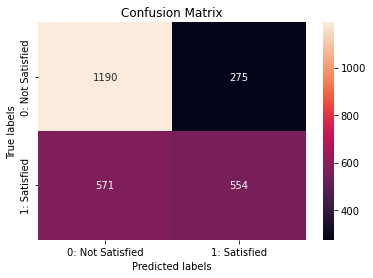

In [35]:
knn_clf = KNN(n_neighbors=101,weights='distance')
knn_clf.fit(x_train, y_train)
knn_pred = knn_clf.predict(x_test)
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied',]); ax.yaxis.set_ticklabels(['0: Not Satisfied', '1: Satisfied'])

recall = sklearn.metrics.recall_score(y_test, knn_pred)
precision = sklearn.metrics.precision_score(y_test, knn_pred)
accuracy = sklearn.metrics.accuracy_score(y_test, knn_pred)
f_measure = sklearn.metrics.f1_score(y_test, knn_pred)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

# Sebastian 

In [47]:
grid_params = {'n_neighbors':[1,2,3,4,5,6,7], 'leaf_size':[45] , 'p' :[4] }

gs = GSearch(KNN(), grid_params)
gs.fit(x_train, y_train)
print(gs.best_params_)
#Angela and ishani

{'leaf_size': 45, 'n_neighbors': 7, 'p': 4}


In [0]:
sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

In [0]:
svc = SVC()

In [0]:
svc.fit(x_train, y_train)
svc_pred = svc.pred(x_test, y_test)

<u>Models to make:</u>

- knn
- decision tree
- Random forest
- SVC \(DON'T DO THIS ONE YET\)
- Logistic regression 
- Adaboost 
- 

Scoring me
trics:

- f1 score
- Recall
- Precision 
- Accuracy

